In [2]:
import tensorflow as tf

### Batch Normalization

#### 主要作用：
    Batch normalization 是一种解决深度神经网络层数太多, 而没办法有效前向传递(forward propagate)的问题。 因为每一层的输出值都会有不同的均值和方差, 所以输出数据的分布也不一样, 如下图, 从左到右是每一层的输入数据分布, 上排的没有Batch Normalization, 下排的有 Batch Normalization。  
    
    图：Relu激励函数
    可以看出, 没有用 BN 的时候, 每层的值迅速全部都变为 0, 也可以说, 所有的神经元都已经死了。而有 BN, relu 过后, 每层的值都能有一个比较好的分布效果, 大部分神经元都还活着。
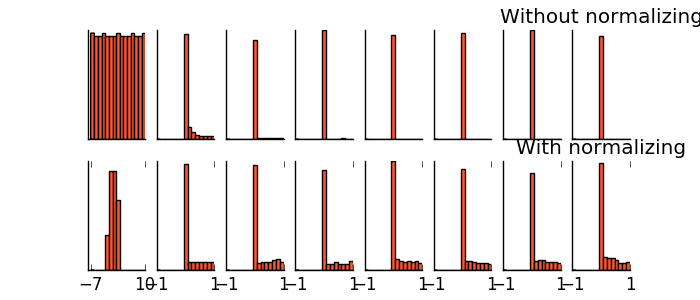   

    图：tanh 激励函数
    可以看出, 没有 NB, 每层的值迅速全部都饱和, 都跑去了 -1/1 这个饱和区间, 有 NB, 即使前一层因变得相对饱和, 但是后面几层的值都被 normalize 到有效的不饱和区间内计算. 确保了一个活的神经网络.
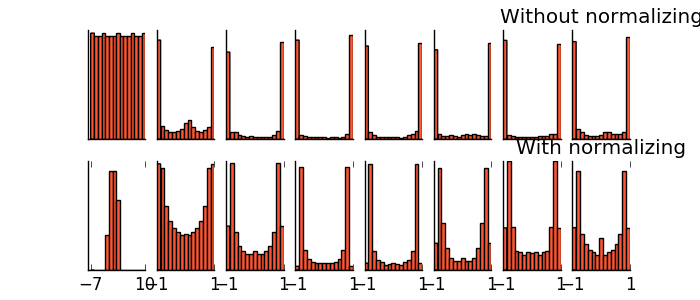

In [3]:
def add_layer(inputs, in_size, out_size, activation_function=None, norm=False):
    # 初始化weights和biases
    Weights = tf.Variable(tf.random_normal([in_size, out_size], mean=0., stddev=1.))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)

    # 计算神经元输出~
    Wx_plus_b = tf.matmul(inputs, Weights) + biases

    # 判断传入的参数是否需要标准化
    if norm:
        # axes，想要标准化的维度
        fc_mean, fc_var = tf.nn.moments(Wx_plus_b,axes=[0])
        
        scale = tf.Variable(tf.ones([out_size]))
        shift = tf.Variable(tf.zeros([out_size]))
        epsilon = 0.001

        # 求均值和方差
        ema = tf.train.ExponentialMovingAverage(decay=0.5)
        def mean_var_with_update():
            ema_apply_op = ema.apply([fc_mean, fc_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(fc_mean), tf.identity(fc_var)
        
        mean, var = mean_var_with_update()
        
        # 标准化计算
        Wx_plus_b = tf.nn.batch_normalization(Wx_plus_b, mean, var, shift, scale, epsilon)

    # 激活函数
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)

    return outputs